In [1]:
import numpy as np
import matplotlib.pyplot as plt

import util
import pickle as pkl
from cycler import cycler

heavy_tailed_results_filename = 'data/Heavy_tailed_reg_LTS_Huber_num_exp_50000_n_200_d_40_est_39__pareto_2_var_2_x_S4BVW.pickle'
with open(heavy_tailed_results_filename,'rb') as f:
    r_heavy = pkl.load(f)

adversarial_results_filename='data/Adv_both_xy_x_scale_10_y_x_ratio_20_Reg_num_exp_50000_n_200_d_40_eps_0.1_est_5_pareto_4_var_2_x_71LFQ.pickle'

with open(adversarial_results_filename,'rb') as f:
    r_adv = pkl.load(f)




c:\Users\ankit\Dropbox\research\other\robust-regression-code\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def updatePlotparameters():
    plt.rc('pgf', rcfonts = False)
    plt.rc('xtick', labelsize = 16)
    plt.rc('ytick', labelsize = 16)
    plt.rc('axes', labelsize = 20)
    plt.rc('font', family='serif')
    plt.rc('text', usetex=True)
    plt.rc('axes', unicode_minus=False)
    
legend_fontsize = 16


# 1. Heavy-tailed Regression (Pareto with parameter 2)

In [3]:

estimators_heavy = [util.EstimatorPlot(col) for col in list(r_heavy.columns)]
for est in estimators_heavy:
    print (f"{est.name}")

Hub_LS_thres_0.125_stopping_0.0005_F_steps_0
Hub_LS_thres_0.125_stopping_0.0005_F_steps_10
Hub_LS_thres_0.125_stopping_0.0005_F_steps_20
Hub_LS_thres_0.125_stopping_0.0005_F_steps_30
Hub_LS_thres_0.25_stopping_0.0005_F_steps_0
Hub_LS_thres_0.25_stopping_0.0005_F_steps_10
Hub_LS_thres_0.25_stopping_0.0005_F_steps_20
Hub_LS_thres_0.25_stopping_0.0005_F_steps_30
Hub_LS_thres_0.5_stopping_0.0005_F_steps_0
Hub_LS_thres_0.5_stopping_0.0005_F_steps_10
Hub_LS_thres_0.5_stopping_0.0005_F_steps_20
Hub_LS_thres_0.5_stopping_0.0005_F_steps_30
Hub_LS_thres_1_stopping_0.0005_F_steps_0
Hub_LS_thres_1_stopping_0.0005_F_steps_10
Hub_LS_thres_1_stopping_0.0005_F_steps_20
Hub_LS_thres_1_stopping_0.0005_F_steps_30
Hub_LS_thres_2_stopping_0.0005_F_steps_0
Hub_LS_thres_2_stopping_0.0005_F_steps_10
Hub_LS_thres_2_stopping_0.0005_F_steps_20
Hub_LS_thres_2_stopping_0.0005_F_steps_30
LTS_steps_100_HT_10_F_steps_0
LTS_steps_100_HT_10_F_steps_10
LTS_steps_100_HT_10_F_steps_20
LTS_steps_100_HT_10_F_steps_30
LTS_st

## 1.1 Huber Regression

In [55]:
def parseNameHuber(est):
    est = util.EstimatorPlot(est)
    if est.type == "Huber":
        if est.filter_steps > 0:
            return f"Huber Reg. with filter"
        else:
            return f"Huber Reg. without filter"
    if est.type == "OLS":
        return "Ordinary Least Squares"
    if est.type == "TS":
        return "Theil-Sen"
    if est.type == "RS":
        return "Ransac"
        
def plot_quantiles_huber(results_pd, show_max=False, label_func = None, linewidth=3, y_lim = None, title="", annotate=False):
    res_sort = results_pd.transform(np.sort)
    fig = plt.figure(figsize=(8,7))
    num_exp = res_sort.shape[0]
    delta = 1 - np.arange(num_exp)/num_exp
    labels = []
    hub_cycler = (cycler(color=['#ff7f00','#ff7f00','#4daf4a','#984ea3','#f781bf']) +
                  cycler(linestyle=['-', 'dotted', 'dashdot', 'dashdot', 'dashdot']))
    ax = plt.gca()
    ax.set_prop_cycle(hub_cycler)
    plt.style.use('seaborn-v0_8-paper')
    plt.style.context('seaborn-v0_8-paper')

    for i, column in enumerate(res_sort.columns):
        if column == "n" or column == "d":
            continue
        if label_func:
            label = label_func(column)
        else:
            label=f"{column}. MaxErr: {res_sort[column].max():.3f}"
        labels.append(label)
        plt.plot(np.log2(1/delta)[:-3], res_sort[column][:-3],label=label,alpha=0.8, linewidth = linewidth)
    plt.xlabel("$\\log_2(1/\\tau)$")
    plt.ylabel("Error at confidence $1 - \\tau$")

    if y_lim:
        plt.ylim(top = y_lim, bottom=0 )
    plt.legend(bbox_to_anchor=(0.45, 0.33), loc='upper left', fontsize=legend_fontsize)
    plt.tight_layout()




### 1.1.1 Figure 1: (a)

['Huber', 'Huber', 'OLS', 'RS', 'TS']


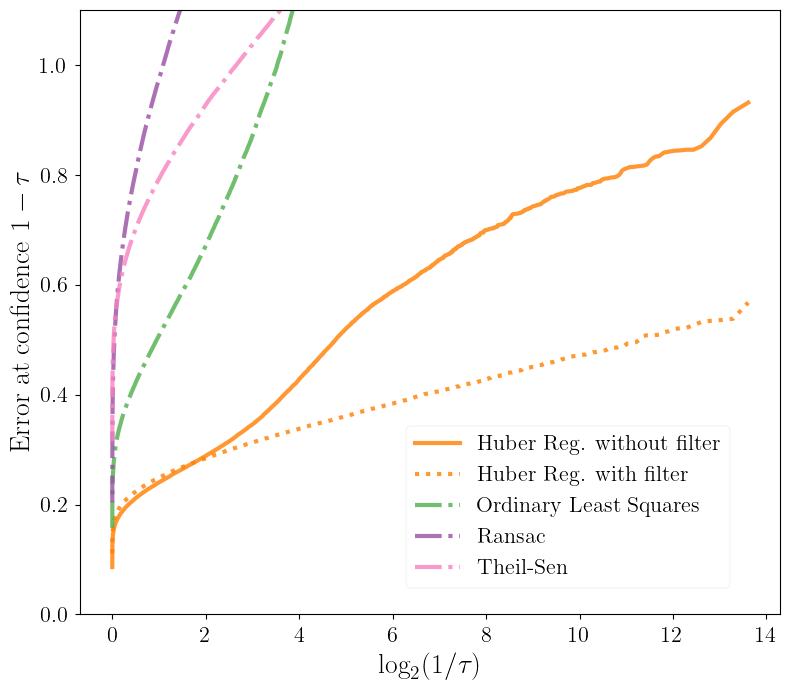

In [56]:
subset_est = [i for i,est in enumerate(estimators_heavy) if  est.type in ["OLS", "TS", "RS"] or (est.huber_thres == 0.5 and est.filter_steps <= 10) ]
# subset_est = [i for i,est in enumerate(estimators_heavy) if  est.type in ["OLS"] or (est.huber_thres == 0.5 and est.filter_steps <= 10) ]

print([estimators_heavy[i].type for i in subset_est])
updatePlotparameters()

plot_quantiles_huber(r_heavy.iloc[:,subset_est],show_max=False, y_lim = 1.1,label_func =parseNameHuber, title =  "Effect of filtering: Huber Regression")
plt.savefig('fig/FIG_1_A_heavy_huber_main.pdf',dpi=600)


### 1.1.2 Figure 3 (Appendix)

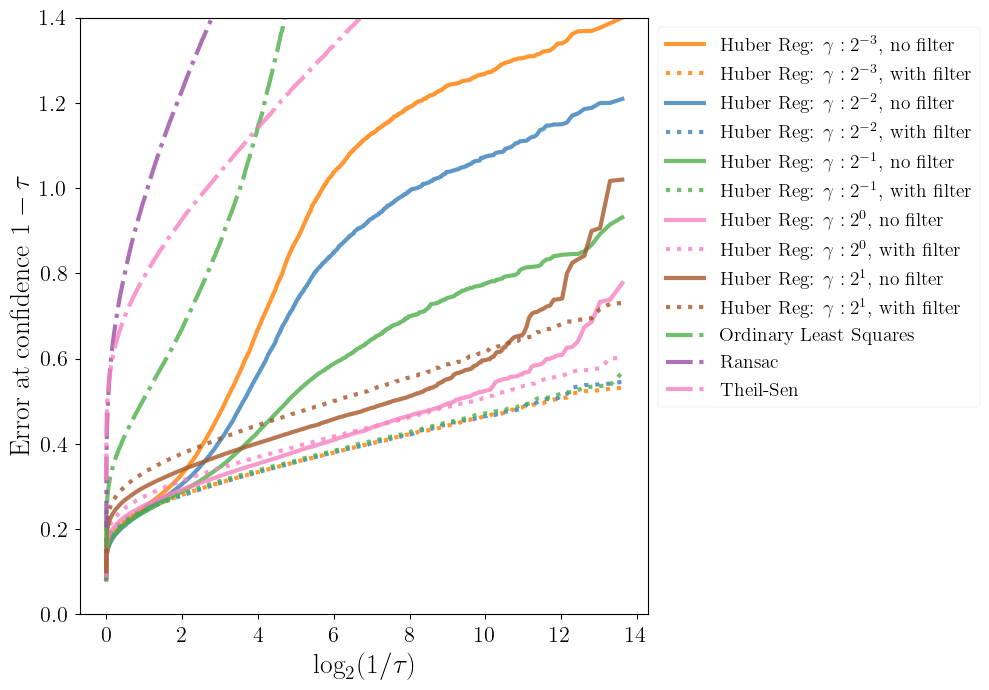

In [58]:
def plot_quantiles_appendix(results_pd, show_max=False, label_func = None, linewidth=3, y_lim = None, title="", annotate=False):
    res_sort = results_pd.transform(np.sort)
    fig = plt.figure(figsize=(10,7))
    num_exp = res_sort.shape[0]
    delta = 1 - np.arange(num_exp)/num_exp
    labels = []

    app_cycler = (cycler(color=['#ff7f00','#ff7f00','#377eb8', '#377eb8','#4daf4a', '#4daf4a', '#f781bf', '#f781bf', '#a65628', '#a65628', '#4daf4a','#984ea3','#f781bf']) +
                  cycler(linestyle=['-', 'dotted', '-', 'dotted',  '-', 'dotted', '-', 'dotted','-', 'dotted', 'dashdot','dashdot','dashdot' ]))
    ax = plt.gca()
    ax.set_prop_cycle(app_cycler)
    plt.style.use('seaborn-v0_8-paper')
    plt.style.context('seaborn-v0_8-paper')
    for i, column in enumerate(res_sort.columns):
        if column == "n" or column == "d":
            continue
        if label_func:
            label = label_func(column)
        else:
            label=f"{column}. MaxErr: {res_sort[column].max():.3f}"
        plt.plot(np.log2(1/delta)[:-3], res_sort[column][:-3],label=label,alpha=0.8, linewidth = linewidth)
    plt.xlabel("$\\log_2(1/\\tau)$")
    plt.ylabel("Error at confidence $1 - \\tau$")

    if y_lim:
        plt.ylim(top = y_lim, bottom=0 )
    plt.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize=legend_fontsize-2)
    plt.tight_layout()

def parseNameHuberRegressionAppendix(est):
    est = util.EstimatorPlot(est)
    if est.type == "Huber":
        gamma_val = int(np.log2(est.huber_thres))
        gamma_string = "2^{" + f"{gamma_val}" + "}"
        if est.filter and est.filter_steps > 0:
            return f"Huber Reg: $\gamma: {gamma_string}$, with filter"
            # return f"Huber Reg: $\gamma: {est.huber_thres:0.3f}$, Filter steps: {est.filter_steps}"
        else:
            return f"Huber Reg: $\gamma: {gamma_string}$, no filter"
            # return f"Huber Reg: $\gamma: {est.huber_thres:0.3f}$, Filter steps: 0"
    if est.type == "OLS":
        return "Ordinary Least Squares"
    if est.type == "TS":
        return "Theil-Sen"
    if est.type == "RS":
        return "Ransac"

subset_est = [i for i,est in enumerate(estimators_heavy) if  est.type in ["OLS", "TS", "RS"] or (est.huber_thres > 0 and est.filter_steps < 20) ]

updatePlotparameters()

plot_quantiles_appendix(r_heavy.iloc[:,subset_est],show_max=False, y_lim = 1.4, title =  "Effect of filtering: Huber Regression", label_func = parseNameHuberRegressionAppendix, annotate=False)
plt.savefig('fig/FIG_3_heavy_huber_appendix.pdf',dpi=600)


## 1.2 Least Trimmed Squares

In [59]:
def parseNameLTS(est):
    est = util.EstimatorPlot(est)
    if est.type == "LTS":
        if est.filter_steps>0:
            return f"LTS: m= {est.hard_threshold}, with filter"
        else:
            return f"LTS: m= {est.hard_threshold}, no filter"
        # if est.filter:
        #     return f"LTS: HT: {est.hard_threshold}, Filter steps: {est.filter_steps}"
        # else:
        #     return f"LTS: HT: {est.hard_threshold}, Filter steps: 0"
    if est.type == "OLS":
        return "Ordinary Least Squares"
    if est.type == "TS":
        return "Theil-Sen"
    if est.type == "RS":
        return "Ransac"



def plot_quantiles_lts(results_pd, show_max=False, label_func = None, linewidth=3, y_lim = None, title="", annotate=False, legend_bbox = None, legend_fontsize_decrement=0, figsize=None):
    res_sort = results_pd.transform(np.sort)
    if figsize:
        fig = plt.figure(figsize=figsize)
    else:
        fig = plt.figure(figsize=(8,7))
    num_exp = res_sort.shape[0]
    delta = 1 - np.arange(num_exp)/num_exp
    labels = []
    lts_cycler = (cycler(color=['#ff7f00','#ff7f00','#377eb8', '#377eb8','#4daf4a','#984ea3','#f781bf']) +
                  cycler(linestyle=['-', 'dotted', '-', 'dotted','dashdot','dashdot','dashdot' ]))

    # lts_cycler = (cycler(color=['#ff7f00','#ff7f00','#ff7f00','#377eb8','#377eb8', '#377eb8','#4daf4a']) +
                #   cycler(linestyle=['-', '--', 'dotted', '-', '--', 'dotted','-']))
#    This is when 3 filter choices for 2 thresholds
    ax = plt.gca()
    ax.set_prop_cycle(lts_cycler)
    plt.style.use('seaborn-v0_8-paper')
    plt.style.context('seaborn-v0_8-paper')
 

    for i, column in enumerate(res_sort.columns):
        if column == "n" or column == "d":
            continue
        if label_func:
            label = label_func(column)
        else:
            label=f"{column}. MaxErr: {res_sort[column].max():.3f}"
        labels.append(label)
        plt.plot(np.log2(1/delta)[:-3], res_sort[column][:-3],label=label,alpha=0.8, linewidth = linewidth)
    plt.xlabel("$\\log_2(1/\\tau)$")
    plt.ylabel("Error at confidence $1 - \\tau$")
    # plt.title(f"{title}") 

    if y_lim:
        plt.ylim(top = y_lim, bottom=0 )
    if legend_bbox:
        plt.legend(bbox_to_anchor=legend_bbox, loc='upper left', fontsize=legend_fontsize-legend_fontsize_decrement)
    else:
        plt.legend(bbox_to_anchor=(0.52, 0.43), loc='upper left', fontsize=legend_fontsize-legend_fontsize_decrement)
    plt.tight_layout()



### 1.2.1 Figure 1 (b)

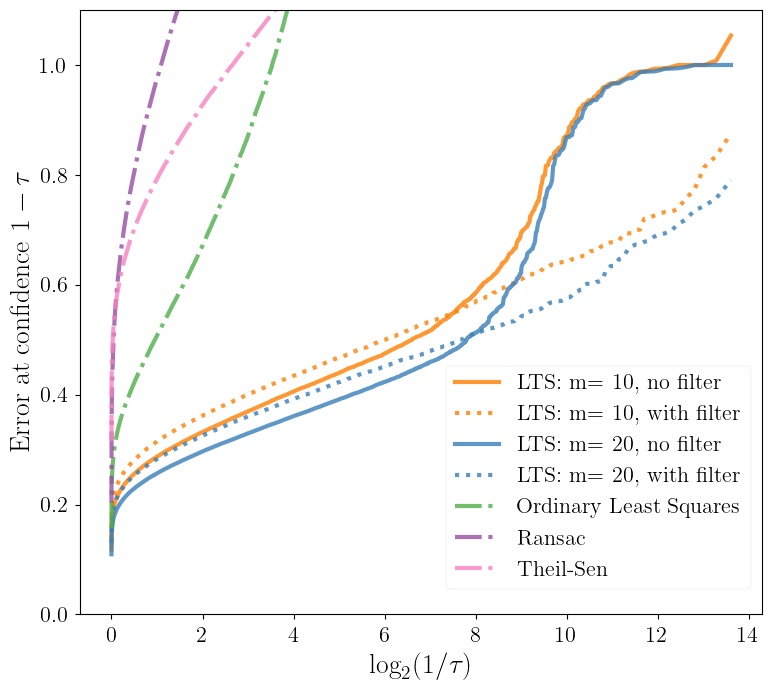

In [60]:
subset_est = [i for i,est in enumerate(estimators_heavy) if  est.type in ["OLS", "TS", "RS"] or ( est.type=="LTS" and est.hard_threshold >=0 and est.hard_threshold<=20 and est.filter_steps < 20)]

updatePlotparameters()

plot_quantiles_lts(r_heavy.iloc[:,subset_est],show_max=False, y_lim = 1.1,label_func =parseNameLTS, title =  "Effect of filtering: Least trimmed squares")

plt.savefig('fig/FIG_1_b_heavy_lts_main.pdf',dpi=600)


### 1.2.2 Figure 4 (Appendix)

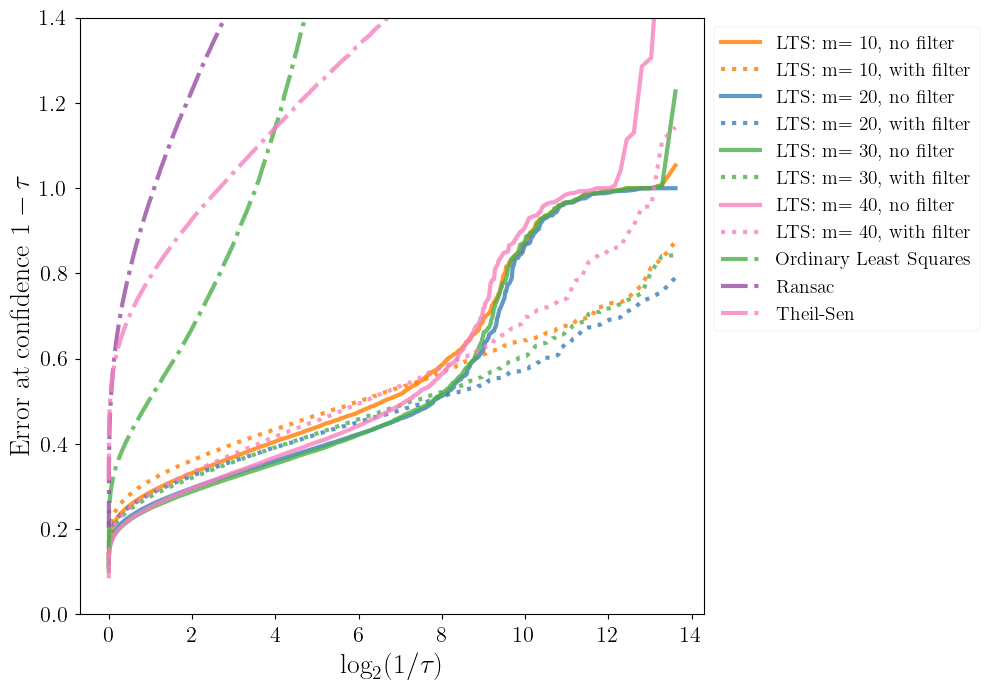

In [61]:
def plot_quantiles_lts_app(results_pd, show_max=False, label_func = None, linewidth=3, y_lim = None, title="", annotate=False, legend_bbox = None, legend_fontsize_decrement=0, figsize=None):
    res_sort = results_pd.transform(np.sort)
    if figsize:
        fig = plt.figure(figsize=figsize)
    else:
        fig = plt.figure(figsize=(8,7))
    num_exp = res_sort.shape[0]
    delta = 1 - np.arange(num_exp)/num_exp
    labels = []
    lts_cycler = (cycler(color=['#ff7f00','#ff7f00','#377eb8', '#377eb8','#4daf4a', '#4daf4a', '#f781bf', '#f781bf',  '#4daf4a','#984ea3','#f781bf']) +
                  cycler(linestyle=['-', 'dotted', '-', 'dotted',  '-', 'dotted', '-', 'dotted','dashdot','dashdot','dashdot' ]))

    # lts_cycler = (cycler(color=['#ff7f00','#ff7f00','#ff7f00','#377eb8','#377eb8', '#377eb8','#4daf4a']) +
                #   cycler(linestyle=['-', '--', 'dotted', '-', '--', 'dotted','-']))
#    This is when 3 filter choices for 2 thresholds
    ax = plt.gca()
    ax.set_prop_cycle(lts_cycler)
    plt.style.use('seaborn-v0_8-paper')
    plt.style.context('seaborn-v0_8-paper')
 

    for i, column in enumerate(res_sort.columns):
        if column == "n" or column == "d":
            continue
        if label_func:
            label = label_func(column)
        else:
            label=f"{column}. MaxErr: {res_sort[column].max():.3f}"
        labels.append(label)
        plt.plot(np.log2(1/delta)[:-3], res_sort[column][:-3],label=label,alpha=0.8, linewidth = linewidth)
    plt.xlabel("$\\log_2(1/\\tau)$")
    plt.ylabel("Error at confidence $1 - \\tau$")
    # plt.title(f"{title}") 

    if y_lim:
        plt.ylim(top = y_lim, bottom=0 )
    if legend_bbox:
        plt.legend(bbox_to_anchor=legend_bbox, loc='upper left', fontsize=legend_fontsize-legend_fontsize_decrement)
    else:
        plt.legend(bbox_to_anchor=(0.52, 0.43), loc='upper left', fontsize=legend_fontsize-legend_fontsize_decrement)
    plt.tight_layout()


subset_est = [i for i,est in enumerate(estimators_heavy) if  est.type in ["OLS", "TS", "RS"] or ( est.type=="LTS" and est.hard_threshold >=0 and est.filter_steps < 20)]

updatePlotparameters()
plot_quantiles_lts_app(r_heavy.iloc[:,subset_est],show_max=False, y_lim = 1.4,label_func =parseNameLTS, title =  "Effect of filtering: Least trimmed squares", legend_bbox=(1., 1.0), legend_fontsize_decrement=2, figsize=(10,7))

plt.savefig('fig/FIG_4_heavy_lts_appendix.pdf',dpi=600)


# 2. Adversarial Linear regression

In [46]:
def advLinRegression(est):
    est = util.EstimatorPlot(est)
    if est.type == "Huber":
        if est.filter:
            return "Huber regression with filter"
        else:
            return "Huber regression without filter"
    if est.type == "LTS":
        if est.filter:
            return "LTS with filter"
        else:
            return "LTS without filter"
    if est.type == "OLS":
        return "Ordinary Least Squares"
        
def plot_quantiles_adv(results_pd, show_max=False, label_func = None, linewidth=3, y_lim = None, title=""):

    adv_cycler = (cycler(color=['#ff7f00','#ff7f00','#377eb8', '#377eb8']) +
                  cycler(linestyle=['-', 'dotted', '-', 'dotted']))


    res_sort = results_pd.transform(np.sort)
    fig = plt.figure(figsize=(7,7))
    num_exp = res_sort.shape[0]
    delta = 1 - np.arange(num_exp)/num_exp
    labels = []

    ax = plt.gca()
    ax.set_prop_cycle(adv_cycler)    
    plt.style.use('seaborn-v0_8-paper')
    plt.style.context('seaborn-v0_8-paper')
    if y_lim:
        plt.ylim(top = y_lim, bottom=0 )

    
    for i, column in enumerate(res_sort.columns):
        if column == "n" or column == "d":
            continue
        if label_func:
            label = label_func(column)
            if label == "Ordinary Least Squares":
                continue
        else:
            label=f"{column}. MaxErr: {res_sort[column].max():.3f}"
        labels.append(label)
        plt.plot(np.log2(1/delta)[:-3], res_sort[column][:-3],label=label,alpha=0.8, linewidth = linewidth)
    plt.xlabel("$\\log_2(1/\\tau)$")
    plt.ylabel("Error at confidence $1 - \\tau$")
    

    plt.legend(bbox_to_anchor=(0.0, 1), loc='upper left',fontsize=legend_fontsize-1)
    plt.tight_layout()




## 2.1 Figure 2 

Hub_LS_thres_0.5_stopping_0.0005
LeastSquares
Hub_LS_thres_0.5_stopping_0.0005_F_steps_30
LTS_steps_100_HT_30
LTS_steps_100_HT_30_F_steps_30
n
d


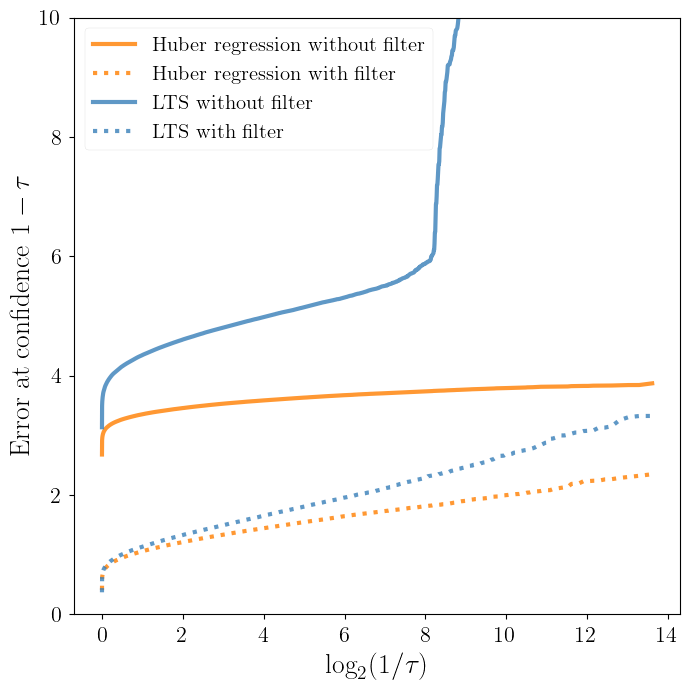

In [47]:

estimators_adv = [util.EstimatorPlot(col) for col in list(r_adv.columns)]
for est in estimators_adv:
    print (f"{est.name}")
updatePlotparameters()
plot_quantiles_adv(r_adv,show_max=False, y_lim = 10,label_func =advLinRegression, title =  "Effect of filtering: Adversarial contamination")
plt.savefig('fig/FIG_2_adv_lin_regression.pdf',dpi=600)
